## **k-nearest neighbor algorithm using Sklearn**

- We will import libraries like pandas, matplotlib, seaborn and scikit learn.
- The make_moons() function generates a 2D dataset that forms two interleaving half circles.
- This kind of data is non-linearly separable and perfect for showing how k-NN handles such cases.

In [19]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Create synthetic 2D data
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

In [3]:
# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

In [4]:
df.head()

,Feature 1,Feature 2,Target
0,0.924865,-0.237611,1
1,2.587875,-0.112862,1
2,-0.421033,0.447485,1
3,0.693145,0.481778,0
4,1.190855,-0.525165,1


In [5]:
df.shape

(300, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  300 non-null    float64
 1   Feature 2  300 non-null    float64
 2   Target     300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature 1,300.0,0.502476,0.927187,-1.717729,-0.087971,0.473627,1.161598,2.827142
Feature 2,300.0,0.269174,0.576712,-1.177543,-0.116878,0.287239,0.684790,1.768665
Target,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.000000,1.000000


In [29]:
df['Target'].value_counts()

Target
1    150
0    150
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Target       0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

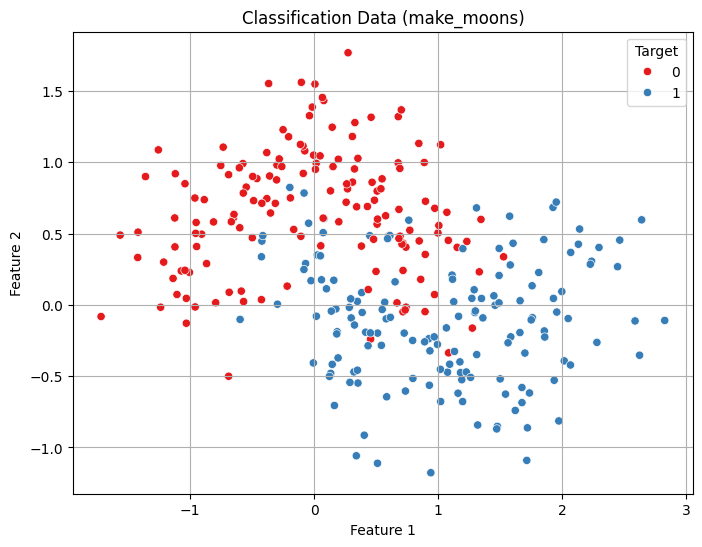

In [30]:
# Visualize the 2D data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("Classification Data (make_moons)")
plt.grid(True)
plt.show()

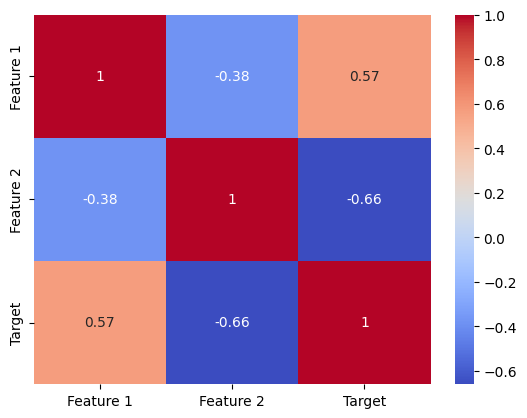

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

2. Train-Test Split and Normalization
- **StandardScaler()** standardizes the features by removing the mean and scaling to unit variance (z-score normalization).
- This is important for distance-based algorithms like k-NN as it ensures all features contribute equally to distance calculations.
- **train_test_split()** splits the data into 70% training and 30% testing.
- **random_state=42** ensures reproducibility.
- **stratify=y** maintains the same class distribution in both training and test sets which is important for balanced evaluation.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Target', axis=1)
y = df['Target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

3. Fit the k-NN Model and Evaluate
- This creates a k-Nearest Neighbors (k-NN) classifier with k = 5 meaning it considers the 5 nearest neighbors for making predictions.
- **fit(X_train, y_train)** trains the model on the training data.
- **predict(X_test)** generates predictions for the test data.
- **accuracy_score()** compares the predicted labels (y_pred) with the true labels (y_test) and calculates the accuracy i.e the proportion of correct predictions.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[('Scalar', StandardScaler()), ('regressor', KNeighborsClassifier(n_neighbors=5))]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Scalar', StandardScaler()),
                ('regressor', KNeighborsClassifier())])

In [15]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0])

In [16]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=5): 0.87


4. Cross-Validation to Choose Best k
Choosing the optimal k-value is critical before building the model for balancing the model's performance.

- A smaller k value makes the model sensitive to noise, leading to overfitting (complex models).
- A larger k value results in smoother boundaries, reducing model complexity but possibly underfitting.

This code performs model selection for the k value in the k-NN algorithm using 5-fold cross-validation:
- It tests values of k from 1 to 20.
- For each k, a new k-NN model is trained and validated using cross_val_score which automatically splits the dataset into 5 folds, trains on 4 and evaluates on 1, cycling through all folds.
- The mean accuracy of each fold is stored in cv_scores.
- A line plot shows how accuracy varies with k helping visualize the optimal choice.
- The best_k is the value of k that gives the highest mean cross-validated accuracy.

In [20]:
from sklearn.model_selection import cross_val_score

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

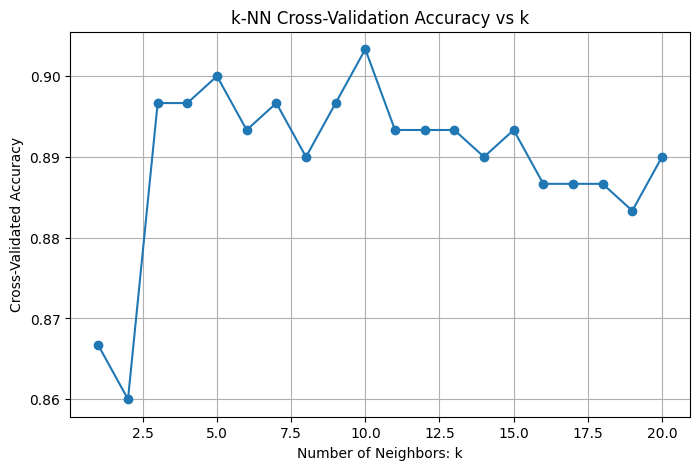

Best k from cross-validation: 10


In [21]:
# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

5. Training with Best k
- The model is trained on the training set with the optimized k (Here k = 6).
- The trained model then predicts labels for the unseen test set to evaluate its real-world performance.

In [22]:
# Train final model with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on test data
y_pred = best_knn.predict(X_test)

6. Evaluate Using More Metrics
- accuracy_score() compares the predicted labels (y_pred) with the true labels (y_test) and calculates the accuracy i.e the proportion of correct predictions.

Print a classification report that includes:

- Precision: How many predicted positives are actually positive.
- Recall: How many actual positives were correctly predicted.
- F1-score: Harmonic mean of precision and recall.
- Support: Number of true instances per class.

In [23]:
print(f"Test Accuracy (k={best_k}) {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=10) 0.90


In [24]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89        45
     Class 1       0.86      0.96      0.91        45

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90



In [25]:
new_data = [[0.9, -0.1]]
prediction = best_knn.predict(new_data)
prediction[0]

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


np.int64(1)

In [26]:
### **Model Building**

In [ ]:
import joblib

joblib.dump(pipeline1, 'KNN.pkl')

KNN = joblib.load('KNN.pkl')

---

### **Raw data**

In [27]:
dataset = {'Weight':[51,62,69,64,65,56,58,57],
          'Height':[167,182,176,173,172,174,169,173],
          'Class':['U', 'N', 'N', 'N', 'N', 'U', 'N', 'N']}

df1 = pd.DataFrame(dataset, index=range(1,9))
df1

,Weight,Height,Class
1,51,167,U
2,62,182,N
3,69,176,N
4,64,173,N
5,65,172,N
6,56,174,U
7,58,169,N
8,57,173,N


In [29]:
x = df1.drop('Class', axis=1)
y = df1['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
new_data = [[55,170]]
prediction = knn.predict(new_data)
prediction[0]

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'N'